# Multiple Regression

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [35]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [36]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


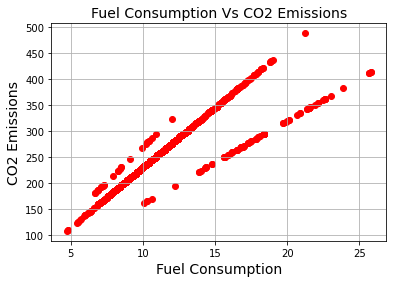

In [37]:
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], color='red')
plt.title('Fuel Consumption Vs CO2 Emissions', fontsize=14)
plt.xlabel('Fuel Consumption', fontsize=14)
plt.ylabel('CO2 Emissions',fontsize=14)
plt.grid(True)
plt.show()

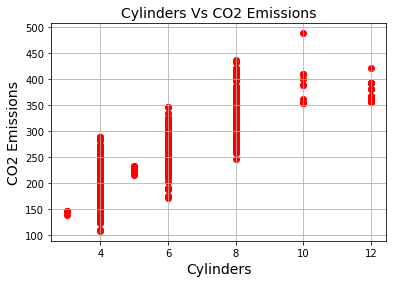

In [38]:
plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'], color='red')
plt.title('Cylinders Vs CO2 Emissions', fontsize=14)
plt.xlabel('Cylinders', fontsize=14)
plt.ylabel('CO2 Emissions',fontsize=14)
plt.grid(True)
plt.show()

In [39]:
X = df[['FUELCONSUMPTION_COMB','CYLINDERS']]
Y = df['CO2EMISSIONS']

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(X,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#prediction with sklearn 
New_FUELCONSUMPTION_COMB = 10
New_CYLINDERS = 6
print('Predicted CO2 Emisssions: \n',regr.predict
      ([[New_FUELCONSUMPTION_COMB, New_CYLINDERS]]))


Intercept: 
 52.288091049059176
Coefficients: 
 [10.64024607 13.92935698]
Predicted CO2 Emisssions: 
 [242.26669364]


In [40]:
#with statsmodels
X = sm.add_constant(X) #adding constant

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3209.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:49:17   Log-Likelihood:                -4899.9
No. Observations:                1067   AIC:                             9806.
Df Residuals:                    1064   BIC:                             9821.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   52.2881 

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Regresi Linear Sederhana

In [41]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

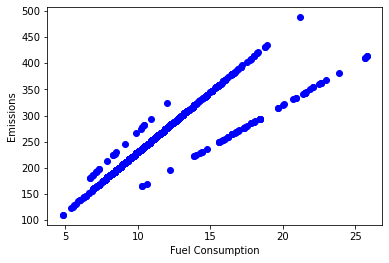

In [42]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')
plt.show()

In [43]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
#coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[16.19496022]]
Intercept:  [68.72771414]


Text(0, 0.5, 'Emission')

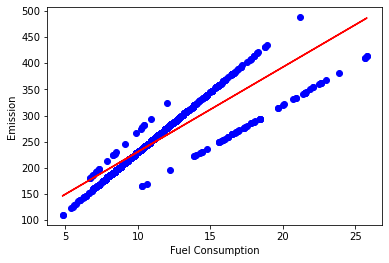

In [44]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")

In [45]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 20.81
Residual sum of squares (MSE): 882.46
R2-score: 0.72


# Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(cdf[['FUELCONSUMPTION_COMB','ENGINESIZE']], cdf['CO2EMISSIONS'])

DecisionTreeRegressor()

In [47]:
nx = 30
ny = 30
#creating a grid of points 
x_fuel = np.linspace(3, 27, nx)
y_engine = np.linspace(0, 10, ny)
xx, yy = np.meshgrid(x_fuel, y_engine)
#evaluating the regression on all the point 
z_emission = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_emission, (nx, ny))

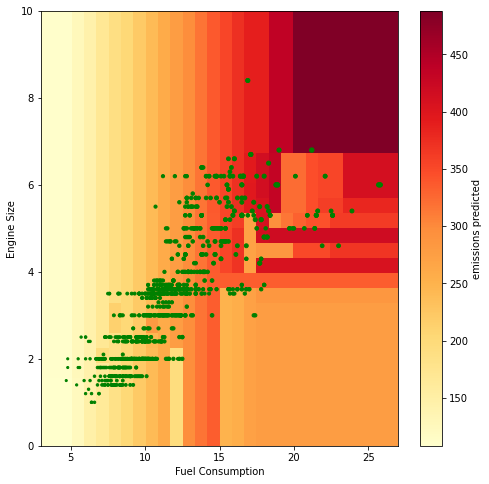

In [48]:
fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_fuel, y_engine, zz, cmap=plt.cm.YlOrRd, shading='auto')
plt.colorbar(label='emissions predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['ENGINESIZE'], s=cdf['CO2EMISSIONS']/25.0, c='g')
# setting the limit for each axis
plt.xlim(np.min(x_fuel), np.max(x_fuel))
plt.ylim(np.min(y_engine), np.max(y_engine))
plt.xlabel('Fuel Consumption')
plt.ylabel('Engine Size')
plt.show()

plt.show()